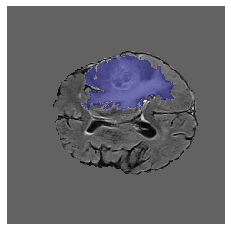

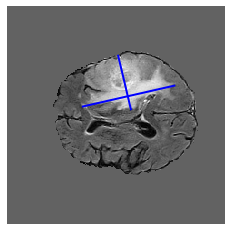

In [14]:
# ground truth segmentation and RANO with a FLAIR channel input as background

import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
from matplotlib import pyplot as plt

example = "Brats18_CBICA_AQT_1"

path1 = "Brats_2018_data/Brats_2018_data/HGG/" + example + "/"+ example + "_whseg_norm.nii.gz"
path2 = "Brats_2018_data/Brats_2018_data/HGG/" + example + "/"+ example + "_whimg_norm.nii.gz"
data = np.load("Brats_2018_data/Brats_2018_data/HGG/" + example + "/" + example + "_RANO.npz")

slice_val = 80
channel_number = 1

img = nib.load(path1)
data1 = img.get_fdata()
data1[:,:,slice_val][ data1[:,:,slice_val]==0 ] = np.nan

img = nib.load(path2)
data2 = img.get_fdata()

plt.imshow(data2[channel_number,:,:,slice_val], cmap='Greys_r', interpolation='nearest')
plt.imshow((data1[:,:,slice_val]), cmap='jet', interpolation='nearest',alpha=0.5)
plt.grid(None) 
plt.axis('off')
plt.show()

#############################################################################################
#                                   segmentation ^ RANO v                                   #
#############################################################################################

lst = data.files
for item in lst:
    data_in = data[item][:,slice_val]

plt.grid(False)
plt.imshow(data2[channel_number,:,:,slice_val], cmap='Greys_r', interpolation='nearest')
plt.grid(None) 
plt.axis('off')

D1 = np.asarray([[data_in[1],data_in[3]],[data_in[0],data_in[2]]]) 
D2 = np.asarray([[data_in[5],data_in[7]],[data_in[4],data_in[6]]]) 

plt.plot(D1[0, :], D1[1, :], lw=2, c='b',label='_nolegend_')
plt.plot(D2[0, :], D2[1, :], lw=2, c='b',label='Prediction')

plt.show()


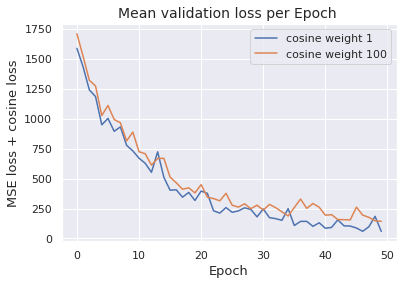

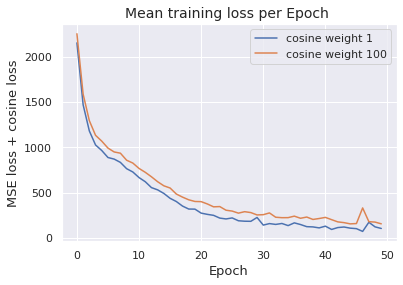

In [8]:
# RANO output loss for both training and validation - over differing penalty types

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd

input_names = ["Unet_H16_M14_CO1_R3_main_data_input_4","Unet_H16_M14_CO100_R3_main_data_input_4"]
legend_names = ["cosine weight 1", "cosine weight 100"]

output_type = ["validation_loss","training_loss"]
output_axis = ["MSE loss + cosine loss","MSE loss + cosine loss"]
output_title = ["validation loss","training loss"
second_out = ["Validation_loss","Training_loss"]

loss_0 = []
loss_Nan_0 = []

for c in range(len(output_type)):
    ax = plt.subplot()
    for s in range(len(input_names)):
        for i in range(50):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

    plt.title("Mean " + output_title[c] + " per Epoch ",fontsize=14)
    ax.legend(legend_names,fontsize=11)
    plt.xlabel("Epoch",fontsize=13)
    plt.ylabel(ylabel=output_axis[c],fontsize=13)
    plt.show()    

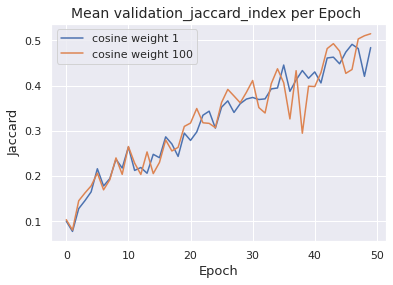

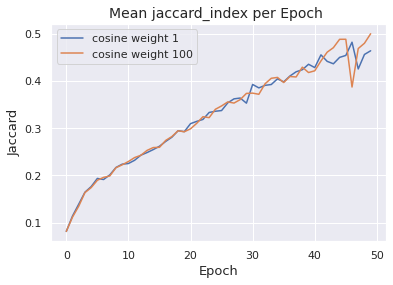

In [10]:
# RANO output Jaccard score for both training and validation - over differing penalty types
# RANO output loss for both training and validation - over differing penalty types

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import pandas as pd

input_names = ["Unet_H16_M14_CO1_R3_main_data_input_4","Unet_H16_M14_CO100_R3_main_data_input_4"]
legend_names = ["cosine weight 1", "cosine weight 100"]

output_type = ["validation_jaccard_index","jaccard_index"]
output_axis = ["Jaccard","Jaccard"]
output_title = ["validation_jaccard_index","jaccard_index"]
second_out = ["Validation_Jaccard","Training_Jaccard"]

loss_0 = []
loss_Nan_0 = []

for c in range(len(output_type)):
    ax = plt.subplot()
    for s in range(len(input_names)):
        for i in range(50):
            
            loss_0 = np.genfromtxt("Checkpoints_RANO/"+ input_names[s]+ "/" + second_out[c] + "/epoch_"+str(i)+output_type[c] + ".csv",delimiter=',')
            loss_Nan_0 = np.append(loss_Nan_0, np.mean(loss_0[np.logical_not(np.isnan(loss_0))]))
            if c > (len(output_type) - 3):
                loss_Nan_0[i] = loss_Nan_0[i]

        ax.plot(range(len(loss_Nan_0)),loss_Nan_0)
        loss_0 = []
        loss_Nan_0 = []

    plt.title("Mean " + output_title[c] + " per Epoch ",fontsize=14)
    ax.legend(legend_names,fontsize=11)
    plt.xlabel("Epoch",fontsize=13)
    plt.ylabel(ylabel=output_axis[c],fontsize=13)
    plt.show()    

In [ ]:
# RANO predictions overlaying ground truth for 3 progressively higher quality examples

# RANO jaccard score of 0.73
image_1 = "Predictions_RANO_testnewtest_maintest/Unet_H16_M14_CO100_R3_main_data_input_4/IMAGE/HGG/Brats18_TCIA01_411_1/Slice_101_0.7368679430535101.png"
# RANO jaccard score of 0.54
image_2 = "Predictions_RANO_testnewtest_maintest/Unet_H16_M14_CO100_R3_main_data_input_4/IMAGE/HGG/Brats18_CBICA_ABB_1/Slice_43_0.5464891041162228.png"
# RANO jaccard score of
image_3 = 

In [ ]:
# RANO predictions overlaying ground truth for 2 different models for qualitative output improvements - 2 examples

In [ ]:
# Segmentaiton training loss plot for 3 different models = RI, PFE, PTE

In [ ]:
# Segmentation training and validation dice score for 3 different models = RI, PFE, PTE

In [ ]:
# Segmentation qualitative outputs for RI and PTE examples


 Mean ['0.565', '0.565', '0.564', '0.565', '0.680', '0.769', '0.783', '0.765', '0.791', '0.774', '0.785'] 
 Median ['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '0.954', '1.000', '1.000', '1.000'] 
 Std ['0.494', '0.495', '0.494', '0.495', '0.410', '0.353', '0.345', '0.355', '0.338', '0.348', '0.342']


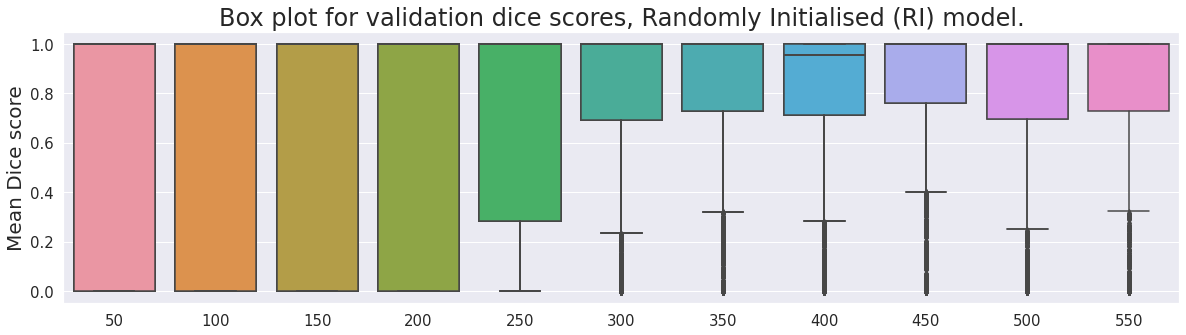


 Mean ['0.565', '0.565', '0.576', '0.766', '0.803', '0.807'] 
 Median ['1.000', '1.000', '1.000', '1.000', '1.000', '1.000'] 
 Std ['0.494', '0.495', '0.482', '0.335', '0.322', '0.322']


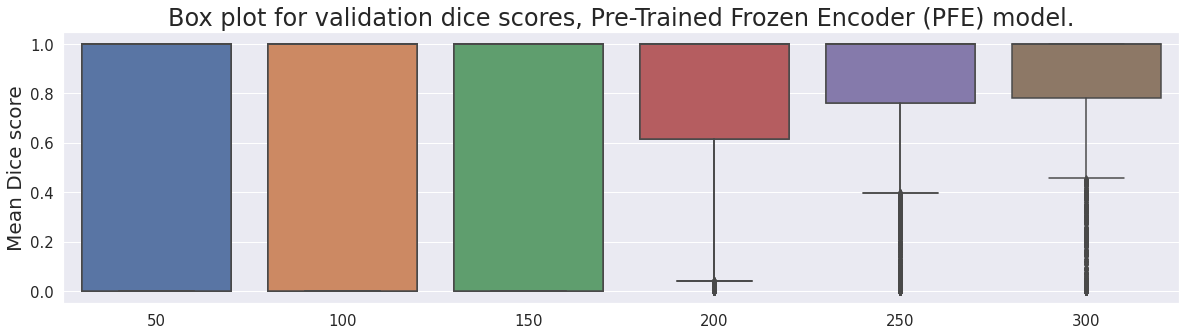


 Mean ['0.565', '0.565', '0.738', '0.802', '0.801', '0.819'] 
 Median ['1.000', '1.000', '1.000', '1.000', '1.000', '1.000'] 
 Std ['0.494', '0.495', '0.361', '0.322', '0.324', '0.312']


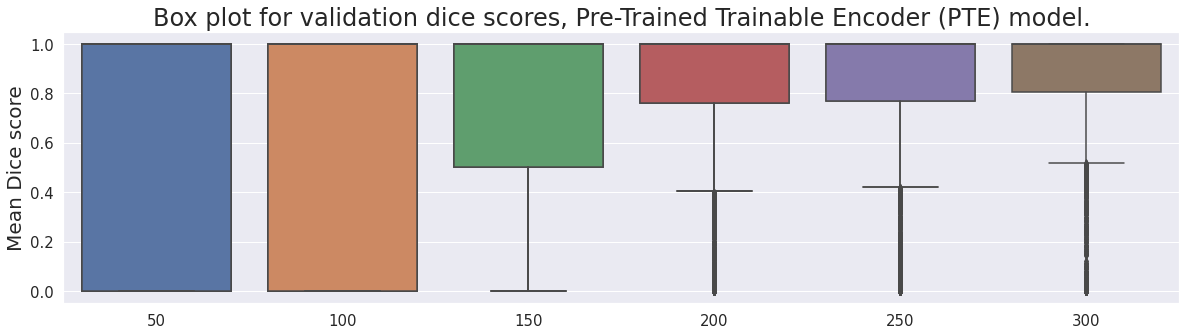

In [9]:
# Segmentation Boxplot progression for RO, PFE and PTE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(font_scale = 1.35)

empty_data = []
base_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Base Model")
fr_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Frozen Model")
unfr_dice_frame_total = pd.DataFrame(data=empty_data, columns=range(1)).assign(Data="Unfrozen Model")

fr_mean,unfr_mean,base_mean= [],[],[]
fr_med, unfr_med, base_med = [],[],[]
fr_std, unfr_std, base_std = [],[],[]

plt.figure(figsize=(20,5))

################################################################
x = np.linspace(50, 550, num=11)
x = x.tolist()

for i in range(len(x)):
    f = str(int(x[i])) 
    validation_dice_base = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_RI_CO100_R3_v2/epoch_0_"+f+"_validation_dice.csv",delimiter=',')
    base_dice = pd.DataFrame(data=validation_dice_base, columns=range(1)).assign(Data="Base Dice")

    base_dice_frame = pd.DataFrame(data=base_dice, columns=range(1)).assign(Data=str(int(x[i])))

    base_dice_frame_total = pd.concat([base_dice_frame_total,base_dice_frame])

    dice_output = pd.melt(base_dice_frame_total, id_vars=['Data'])
    ax = sns.boxplot(x="Data", y="value", data=dice_output)
    base_mean.append(np.mean(base_dice_frame[0].to_numpy()))
    base_med.append(np.median(base_dice_frame[0].to_numpy()))
    base_std.append(np.std(base_dice_frame[0].to_numpy()))

np.set_printoptions(precision=3)
print("\n",
      "Mean",['%.3f' % n for n in base_mean],"\n",
      "Median",['%.3f' % n for n in base_med],"\n",
      "Std",['%.3f' % n for n in base_std])

plt.ylim([-0.05,1.05])
plt.title("Box plot for validation dice scores, Randomly Initialised (RI) model.",fontsize=24)
plt.ylabel("Mean Dice score",fontsize=20)
plt.xlabel("")

plt.show()

plt.figure(figsize=(20,5))

##############################################################
x = np.linspace(50, 300, num=6)
x = x.tolist()

for i in range(len(x)):
    f = str(int(x[i])) 
    
    validation_dice_fr = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_PFE_CO100_R3_v2/epoch_0_"+f+"_validation_dice.csv",delimiter=',')
    fr_dice = pd.DataFrame(data=validation_dice_fr, columns=range(1)).assign(Data="fr Dice")

    fr_dice_frame = pd.DataFrame(data=fr_dice, columns=range(1)).assign(Data=str(int(x[i])))

    fr_dice_frame_total = pd.concat([fr_dice_frame_total,fr_dice_frame])

    dice_output = pd.melt(fr_dice_frame_total, id_vars=['Data'])
    ax = sns.boxplot(x="Data", y="value", data=dice_output)
    fr_mean.append(np.mean(fr_dice_frame[0].to_numpy()))
    fr_med.append(np.median(fr_dice_frame[0].to_numpy()))
    fr_std.append(np.std(fr_dice_frame[0].to_numpy()))

print("\n",
      "Mean",['%.3f' % n for n in fr_mean],"\n",
      "Median",['%.3f' % n for n in fr_med],"\n",
      "Std",['%.3f' % n for n in fr_std])    

plt.ylim([-0.05,1.05])
plt.title("Box plot for validation dice scores, Pre-Trained Frozen Encoder (PFE) model.",fontsize=24)
plt.ylabel("Mean Dice score",fontsize=20)
plt.xlabel("")
plt.show()

plt.figure(figsize=(20,5))

###############################################################
x = np.linspace(50, 300, num=6)
x = x.tolist()

for i in range(len(x)):
    f = str(int(x[i])) 
    
    validation_dice_unfr = np.genfromtxt("Checkpoints/split_data_experiments/Full_model_MK6_H16_PTE_CO100_R3_v2/epoch_0_"+f+"_validation_dice.csv",delimiter=',')
    unfr_dice = pd.DataFrame(data=validation_dice_unfr, columns=range(1)).assign(Data="Unfr Dice")

    unfr_dice_frame = pd.DataFrame(data=unfr_dice, columns=range(1)).assign(Data=str(int(x[i])))

    unfr_dice_frame_total = pd.concat([unfr_dice_frame_total,unfr_dice_frame])

    dice_output = pd.melt(unfr_dice_frame_total, id_vars=['Data'])
    ax = sns.boxplot(x="Data", y="value", data=dice_output)
    unfr_mean.append(np.mean(unfr_dice_frame[0].to_numpy()))
    unfr_med.append(np.median(unfr_dice_frame[0].to_numpy()))
    unfr_std.append(np.std(unfr_dice_frame[0].to_numpy()))

print("\n",
      "Mean",['%.3f' % n for n in unfr_mean],"\n",
      "Median",['%.3f' % n for n in unfr_med],"\n",
      "Std",['%.3f' % n for n in unfr_std])

plt.ylim([-0.05,1.05])
plt.title("Box plot for validation dice scores, Pre-Trained Trainable Encoder (PTE) model.",fontsize=24)
plt.ylabel("Mean Dice score",fontsize=20)
plt.xlabel("")
plt.show()


In [ ]:
# Segmentation outputs for differeing training data size amounts